In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
class GaborFilter:
    def gabor_filter(self, K, s, g, l, p, theta):
        k = K//2
        G = np.zeros((K, K), dtype=np.float32)
        rad = theta * np.pi / 180.0
        for i in range(K):
            for j in range(K):
                y, x = i-k, j-k
                xx = np.cos(rad)*x + np.sin(rad)*y
                yy = -np.sin(rad)*x + np.cos(rad)*y
                G[i, j] = np.exp(-(xx**2+(g**2)*(yy**2))/ (2*(s**2))) * np.cos(2*np.pi*xx/l + p)
        return G / np.sum(np.abs(G))
    
    def normalize_val255(self, G):
        H = G - np.min(G)
        return (H / H.max() * 255).astype(np.uint8)
    
    def filtering(self, img_gray, K, s, g, l, p, theta):
        k = K//2
        gabor = self.gabor_filter(K=K, s=s, g=g, l=l, p=p, theta=theta)
        input_img = np.pad(img_gray, (k, k), 'edge')
        output_img = np.zeros_like(img_gray, dtype=np.float32)
        H, W = img_gray.shape
        for i in range(H):
            for j in range(W):
                output_img[i, j] = np.sum(input_img[i:i+K, j:j+K] * gabor)
        output_img = np.clip(output_img, 0, 255).astype(np.uint8)
        return output_img

In [14]:
class Solver:
    def __init__(self):
        self.filter = GaborFilter()
        
    def problem_77(self):
        f = self.filter.gabor_filter(K=111, s=10, g=1.2, l=10, p=0, theta=0)
        f = self.filter.normalize_val255(f)
        return f
    
    def problem_78(self):
        for i in range(4):
            plt.subplot(1, 4, i+1)
            f = self.filter.gabor_filter(K=111, s=10, g=1.2, l=10, p=0, theta=45*i)
            f = self.filter.normalize_val255(f)
            plt.imshow(f, cmap="gray")
            plt.title("Angle {}".format(45*i))
            ax = plt.gca()
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
        plt.plot()
        
    def problem_79(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.figure(figsize=(12, 24))
        for i in range(4):
            plt.subplot(1, 4, i+1)
            output_img = self.filter.filtering(img_gray, K=11, s=1.5, g=1.2, l=3, p=0, theta=45*i)
            plt.imshow(output_img, cmap="gray")
            plt.title("Angle {}".format(45*i))
            ax = plt.gca()
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
        plt.plot()

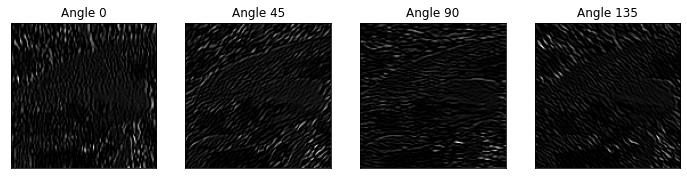

In [15]:
input_img = cv2.imread("../imori.jpg")
solver = Solver()
solver.problem_79(input_img)